In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.ndim

2

In [5]:
df.shape

(4340, 8)

In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [7]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [8]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


encoding categorical data

In [40]:
df.fuel.tail()

,fuel
4335,Diesel
4336,Diesel
4337,Petrol
4338,Diesel
4339,Petrol


In [46]:
df.tail(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [47]:
mapdf=df.copy()

In [10]:
ndf=df.copy()
ndf.fuel.unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [11]:
ndf.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [48]:
fuel_encoder=LabelEncoder()
mapdf['fuel']=fuel_encoder.fit_transform(mapdf['fuel'])     # encoded already done so using mapdf insted of ndf to chech mapping
print(fuel_encoder.classes_)

['CNG' 'Diesel' 'Electric' 'LPG' 'Petrol']


In [54]:
seller_encoder=LabelEncoder()
mapdf['seller_type']=seller_encoder.fit_transform(mapdf['seller_type'])
print(seller_encoder.classes_)

['Dealer' 'Individual' 'Trustmark Dealer']


In [57]:
transmission_encoder=LabelEncoder()
mapdf['transmission']=transmission_encoder.fit_transform(mapdf['transmission'])
print(transmission_encoder.classes_)

['Automatic' 'Manual']


In [60]:
owner_encoder=LabelEncoder()
mapdf['owner']=owner_encoder.fit_transform(mapdf['owner'])
print(owner_encoder.classes_)

['First Owner' 'Fourth & Above Owner' 'Second Owner' 'Test Drive Car'
 'Third Owner']


In [12]:
ndf['fuel']=LabelEncoder().fit_transform(ndf['fuel'])
ndf['seller_type']=LabelEncoder().fit_transform(ndf['seller_type'])
ndf['transmission']=LabelEncoder().fit_transform(ndf['transmission'])
ndf['owner']=LabelEncoder().fit_transform(ndf['owner'])


In [53]:
ndf.fuel.unique()

array([4, 1, 0, 3, 2])

Fuel map:
0-cng ,
1-deasel ,
2-electric,
3-lpg ,
4-petrol

In [56]:
ndf.seller_type.unique()

array([1, 0, 2])

seller map:
0-Dealer,
1-Individual,
2-Trustmark dealer

In [58]:
ndf.transmission.unique()

array([1, 0])

transmission map:
0-automatic,
1-mannual

In [59]:
ndf.owner.unique()

array([0, 2, 1, 4, 3])

owner map:
0-First Owner,
1-Fourth & Above Owner,
2-second owner,
3-test drive car,
4-third owner

In [36]:
ndf.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,car_age
0,2007,60000,70000,4,1,1,0,2025,18
1,2007,135000,50000,4,1,1,0,2025,18
2,2012,600000,100000,1,1,1,0,2025,13
3,2017,250000,46000,4,1,1,0,2025,8
4,2014,450000,141000,1,1,1,2,2025,11
5,2007,140000,125000,4,1,1,0,2025,18
6,2016,550000,25000,4,1,1,0,2025,9
7,2014,240000,60000,4,1,1,2,2025,11
8,2015,850000,25000,4,1,1,0,2025,10
9,2017,365000,78000,0,1,1,0,2025,8


adding current age of cars(2025)

In [14]:
ndf['current_year']=2025
ndf.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,2025
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,2025
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,2025
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,2025
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,2025


In [15]:
ndf['car_age']=ndf['current_year']-ndf['year']

In [16]:
ndf.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,car_age
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,2025,18
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,2025,18
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,2025,13
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,2025,8
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,2025,11


In [17]:
ndf.drop('name',axis=1,inplace=True)
ndf.corr()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,car_age
year,1.000000,0.413922,-0.419688,-0.120002,-0.098352,-0.143800,-0.414705,NaN,-1.000000
selling_price,0.413922,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,NaN,-0.413922
km_driven,-0.419688,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,NaN,0.419688
fuel,-0.120002,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,NaN,0.120002
seller_type,-0.098352,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,NaN,0.098352
transmission,-0.143800,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,NaN,0.143800
owner,-0.414705,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,NaN,0.414705
current_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car_age,-1.000000,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,NaN,1.000000


<Axes: >

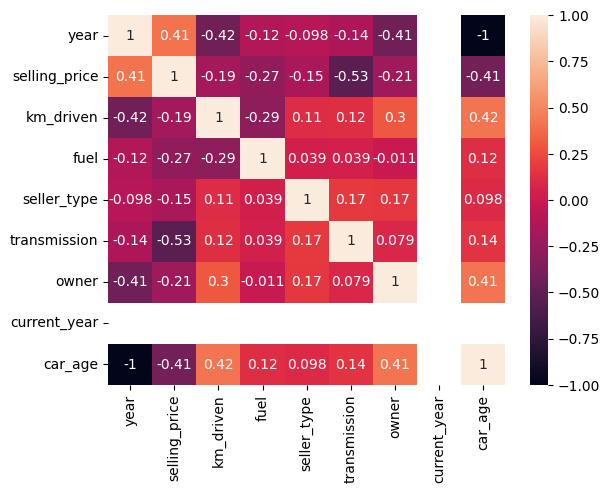

In [18]:
sns.heatmap(ndf.corr(),annot=True)

<Axes: >

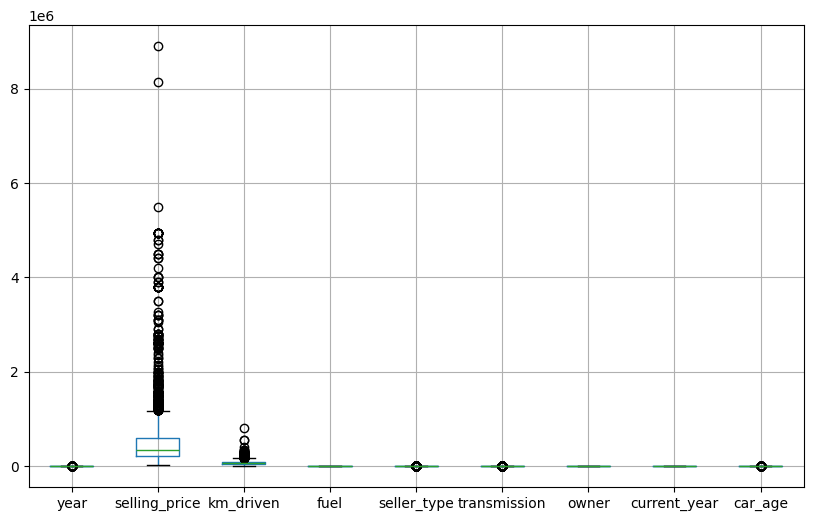

In [19]:
ndf.boxplot(figsize=(10, 6))

ML-DecisionTree

Selecting feature and target

In [20]:
x=np.array(ndf.drop('selling_price',axis=1))
y=np.array(ndf.selling_price)

spliting the data

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
len(x_test)

868

model selection

In [22]:
model=DecisionTreeRegressor()

fitting model

In [23]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

predicting the model

In [24]:
actual_value=y_test
actual_value[:10]

array([1000000, 1350000, 1150000, 1025000,  180000,   80000,  110000,
        180000,  225000,  525000])

In [25]:
predicted_value=model.predict(x_test)
predicted_value[:10]

array([1000000.        ,  750000.        ,  580833.33333333,
        500000.        ,  200000.        ,  220000.        ,
        120000.        ,  170000.        ,  225000.        ,
        525000.        ])

perfomance metrics

In [26]:
mse=mean_squared_error(actual_value,predicted_value)
mse

226873756376.10593

In [27]:
rmse=np.sqrt(mse)
rmse

np.float64(476312.66661312495)

accuracy checking

In [28]:
r2_score(actual_value,predicted_value)

0.48270774041641673

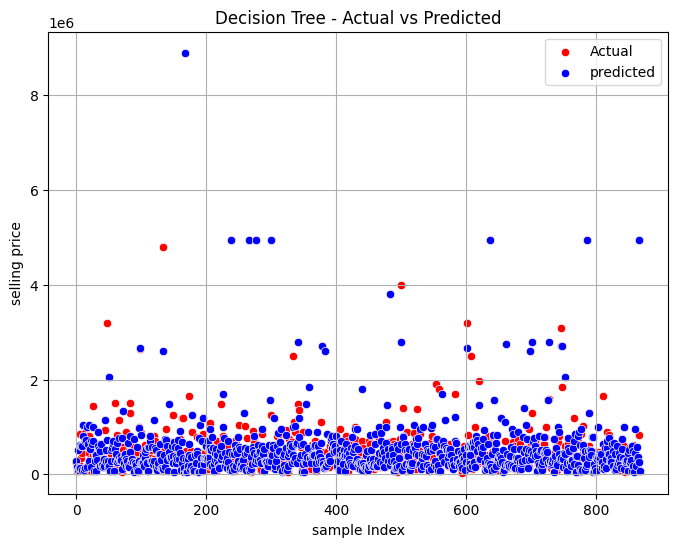

In [80]:
plt.figure(figsize=(8,6))
a=actual_value
b=predicted_value
sns.scatterplot(x=range(len(a)),y=a,color='red',label='Actual')
sns.scatterplot(x=range(len(b)),y=b,color='blue',label='predicted')
plt.xlabel("sample Index")
plt.ylabel("selling price")
plt.title("Decision Tree - Actual vs Predicted")
plt.grid(True)
plt.show()

In [30]:
ndf.columns


Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'current_year', 'car_age'],
      dtype='object')

dropinf year and current_year column from ndf to reduce overfitting

In [31]:
nndf=ndf.copy()
nndf.drop('year',axis=1,inplace=True)
nndf.drop('current_year',axis=1,inplace=True)

In [63]:
nndf.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,60000,70000,4,1,1,0,18
1,135000,50000,4,1,1,0,18
2,600000,100000,1,1,1,0,13
3,250000,46000,4,1,1,0,8
4,450000,141000,1,1,1,2,11


Training again with optimize columns

In [64]:
x=np.array(nndf.drop('selling_price',axis=1))
y=np.array(nndf.selling_price)

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
len(x_test)

868

In [67]:
model=DecisionTreeRegressor()

In [68]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

now predicting

In [71]:
nactual_value=y_test
nactual_value[:10]

array([250000,  80000,  85000, 220000, 225000, 110000, 850000, 350000,
       450000,  92800])

In [72]:
npredicted_value=model.predict(x_test)
npredicted_value[:10]

array([275000.  , 160000.  ,  95000.  , 515000.  , 125000.  , 145000.  ,
       610000.  , 600000.  , 604999.75,  92800.  ])

perfomance checking

In [73]:
r2_score(nactual_value,npredicted_value)

0.42320329500159015

In [74]:
nndf.columns

Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'car_age'],
      dtype='object')

In [75]:
nndf.head(2)

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,60000,70000,4,1,1,0,18
1,135000,50000,4,1,1,0,18


In [76]:
new_car=pd.DataFrame({
    'km_driven':[80000],
    'fuel':[4], #petrol
    'seller_type':[1], #individual
    'transmission':[0], #automatic
    'owner':[0], #first owner
    'car_age':[5]
})

In [77]:
model.predict(new_car)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


array([370000.])